In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

## Converting CSV files to DataFrames

In [2]:
emp_gen =pd.read_csv("hr-analytics-case-study/general_data.csv")
emp_sur =pd.read_csv("hr-analytics-case-study/employee_survey_data.csv")
man_sur =pd.read_csv("hr-analytics-case-study/manager_survey_data.csv")
in_out_data = pd.read_csv("extracted_features_from_in_out_time.csv")

In [3]:
emp_gen.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
emp_gen.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [5]:
emp_sur.describe()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4385.000000,4390.000000,4372.000000
mean,2205.500000,2.723603,2.728246,2.761436
std,1273.201673,1.092756,1.101253,0.706245
min,1.000000,1.000000,1.000000,1.000000
25%,1103.250000,2.000000,2.000000,2.000000
50%,2205.500000,3.000000,3.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000
max,4410.000000,4.000000,4.000000,4.000000


In [6]:
man_sur.describe()

,EmployeeID,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000
mean,2205.500000,2.729932,3.153741
std,1273.201673,0.711400,0.360742
min,1.000000,1.000000,3.000000
25%,1103.250000,2.000000,3.000000
50%,2205.500000,3.000000,3.000000
75%,3307.750000,3.000000,3.000000
max,4410.000000,4.000000,4.000000


## Missing Data Handling

In [7]:
(emp_sur.EnvironmentSatisfaction).isnull().sum()

25

In [8]:
# emp_sur.EnvironmentSatisfaction.fillna(0)

In [9]:
(emp_sur.EnvironmentSatisfaction<=0).sum()

0

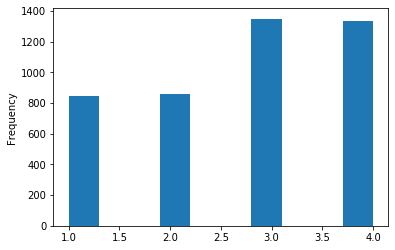

In [10]:
emp_sur.EnvironmentSatisfaction.plot.hist()

### Filling the 'zero' values with 3 as it is the highest occuring label. 

In [11]:
emp_sur.EnvironmentSatisfaction= emp_sur.EnvironmentSatisfaction.fillna(3)

In [12]:
(emp_sur.EnvironmentSatisfaction).describe()

count    4410.000000
mean        2.725170
std         1.089852
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64

In [13]:
(emp_sur.JobSatisfaction).isnull().sum()

20

In [14]:
(emp_sur.JobSatisfaction<=0).sum()

0

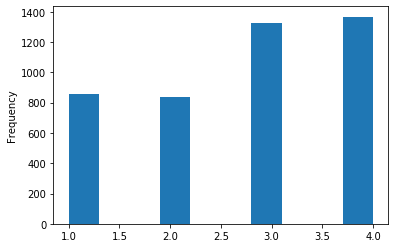

In [15]:
emp_sur.JobSatisfaction.plot.hist()

### Filling the 'zero' values with 4 as it is the highest occuring label.

In [16]:
emp_sur.JobSatisfaction =emp_sur.JobSatisfaction.fillna(4) 

In [17]:
(emp_sur.JobSatisfaction).describe()

count    4410.000000
mean        2.734014
std         1.102071
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

In [18]:
(emp_sur.WorkLifeBalance).isnull().sum()

38

In [19]:
# emp_sur.WorkLifeBalance.fillna(0)

In [20]:
(emp_sur.WorkLifeBalance<=0).sum()

0

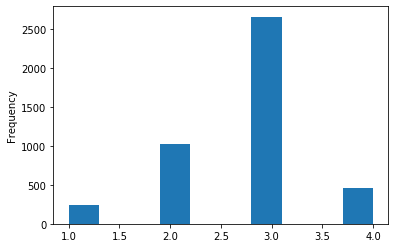

In [21]:
emp_sur.WorkLifeBalance.plot.hist()

### As we can see that 75% of the count has the value 3, so we will fill the nan values with 3.

In [22]:
emp_sur.WorkLifeBalance= emp_sur.WorkLifeBalance.fillna(3)

In [23]:
(emp_sur.WorkLifeBalance).describe()

count    4410.000000
mean        2.763492
std         0.703541
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: WorkLifeBalance, dtype: float64

### Merging the DataFrames (emp_gen and emp_sur) based on the column 'EmployeeID'

In [24]:
total_data=(pd.merge(emp_gen, emp_sur,on='EmployeeID'))

In [25]:
total_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,8,0,1.0,6,1,0,0,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,8,1,6.0,3,5,1,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,8,3,5.0,2,5,0,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,8,3,13.0,5,8,7,5,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,8,2,9.0,2,6,0,4,4.0,1.0,3.0
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,8,0,28.0,5,7,7,7,3.0,2.0,2.0
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,8,1,5.0,2,0,0,0,1.0,3.0,1.0
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,...,8,3,10.0,2,0,0,0,1.0,2.0,3.0
8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,Male,...,8,0,10.0,2,9,7,8,2.0,4.0,3.0
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,...,8,1,6.0,2,6,1,5,2.0,1.0,3.0


### Merging the DataFrame 'man_sur' to 'total_data'.

In [26]:
total_data=(pd.merge(total_data, man_sur,on='EmployeeID'))

In [27]:
total_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,28.0,5,7,7,7,3.0,2.0,2.0,3,3
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,5.0,2,0,0,0,1.0,3.0,1.0,3,4
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,...,10.0,2,0,0,0,1.0,2.0,3.0,3,4
8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,Male,...,10.0,2,9,7,8,2.0,4.0,3.0,3,4
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,...,6.0,2,6,1,5,2.0,1.0,3.0,3,3


### Checking the number of Unique Values in each column.

In [28]:
unique_counts = pd.DataFrame.from_records([(col,total_data[col].nunique()) for col in total_data.columns],columns=['Atrribute_Name', 'Num_Unique_Vals'])
print('Number of unique values' +':\n')
print(unique_counts)

Number of unique values:

             Atrribute_Name  Num_Unique_Vals
0                       Age               43
1                 Attrition                2
2            BusinessTravel                3
3                Department                3
4          DistanceFromHome               29
5                 Education                5
6            EducationField                6
7             EmployeeCount                1
8                EmployeeID             4410
9                    Gender                2
10                 JobLevel                5
11                  JobRole                9
12            MaritalStatus                3
13            MonthlyIncome             1349
14       NumCompaniesWorked               10
15                   Over18                1
16        PercentSalaryHike               15
17            StandardHours                1
18         StockOptionLevel                4
19        TotalWorkingYears               40
20    TrainingTimesLastYear  

### The number of Unique Values in the columns - EmployeeCount, Over18, StandardHours = 1. So, these columns are not necessary in the analysis as they do not convey any extra information about the employee. Therefore, we are dropping these columns.

In [29]:
total_data.drop(['Over18','StandardHours','EmployeeCount'],axis = 1, inplace = True)

In [30]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 26 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
PercentSalaryHike          4410 non-null int64
StockOptionLevel           4410 non-null int64
TotalWorkingYears          4401 non-null float64
TrainingTimesLastYear      4410 non-null int64
YearsAtCompany             4410 non-

### Number of non-null objects - NumCompaniesworked = 19 and TotalWorkingYears 9. They account for a small percentage of the total dataset. Therefore, we are dropping these rows.

In [31]:
total_data=total_data.dropna()

### Merging the DataFrame 'in_out_data' to 'total_data'

In [32]:
total_data = pd.merge(total_data, in_out_data, on='EmployeeID')

### One-hot encoding for all the categorical features.

In [33]:
categorical_features_array = ['Department','EducationField','Gender','BusinessTravel', 'JobRole', 'MaritalStatus']
for x in categorical_features_array:
    total_data = pd.concat([total_data,pd.get_dummies(total_data[x], prefix=x)],axis=1)
    total_data.drop([x],axis=1, inplace=True)

In [34]:
total_data.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,No,6,2,1,1,131160,1.0,11,0,...,0,0,0,0,0,0,0,0,1,0
1,31,Yes,10,1,2,1,41890,0.0,23,1,...,0,0,0,0,1,0,0,0,0,1
2,32,No,17,4,3,4,193280,1.0,15,3,...,0,0,0,0,0,1,0,0,1,0
3,38,No,2,5,4,3,83210,3.0,11,3,...,0,0,0,0,0,0,0,0,1,0
4,32,No,10,1,5,1,23420,4.0,12,2,...,0,0,0,0,0,1,0,0,0,1


### Label encoding for 'Attrition' column.

In [35]:
label_encoder= preprocessing.LabelEncoder()
total_data['Attrition'] = label_encoder.fit_transform(total_data['Attrition'])

In [36]:
total_data.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,0,6,2,1,1,131160,1.0,11,0,...,0,0,0,0,0,0,0,0,1,0
1,31,1,10,1,2,1,41890,0.0,23,1,...,0,0,0,0,1,0,0,0,0,1
2,32,0,17,4,3,4,193280,1.0,15,3,...,0,0,0,0,0,1,0,0,1,0
3,38,0,2,5,4,3,83210,3.0,11,3,...,0,0,0,0,0,0,0,0,1,0
4,32,0,10,1,5,1,23420,4.0,12,2,...,0,0,0,0,0,1,0,0,0,1


In [37]:
data_in = total_data.drop(['Attrition'],axis=1, inplace=False)
data_out = total_data['Attrition']

### Splitting the dataset into training_data and testing_data.

In [38]:
x_train, x_test, y_train, y_test = train_test_split(data_in, data_out , test_size=0.20, random_state=42)

In [39]:
print(x_train.shape) #(3505,47)
print(y_train.shape) #(877,47)

(3505, 47)
(3505,)


In [40]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
y_pred  = logmodel.predict(x_test)

In [42]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logmodel.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


In [43]:
# plt.figure(figsize=(20,20))
# sns.heatmap(total_data.corr(),annot=True)
# plt.show()


In [44]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[755   0]
 [122   0]]
